In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import datetime

In [85]:
data_folder = './MovieSummaries/'

summaries = pd.read_csv(data_folder+'plot_summaries.txt', sep='	', header=None, names=["wiki_id", "summary"])
movie_meta = pd.read_csv(data_folder+'movie.metadata.tsv', sep='	', header=None, names=["wiki_id", "freebase_id", "movie_name", "release_date", "revenue", "runtime", "languages", "coutries", "genres"])
char_meta = pd.read_csv(data_folder+'character.metadata.tsv', sep='	', header=None, names=["wiki_id", "freebase_id", "release_date", "character_name", "birth", "gender", "height", "ethnicity", "actor_name", "actor_age", "character_actor_map", "character_id", "actor_id"])
#tvtropes_clusters = pd.read_csv(data_folder+'tvtropes.clusters.txt')
#name_clusters = pd.read_csv(data_folder+'name.clusters.txt')

In [86]:
import nltk
nltk.download('omw-1.4')
from pattern.en import sentiment

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\etien\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [87]:
# number of samples
total_length = len(summaries)

In [88]:
# select only the data with 'war' in it
summary_with_war = summaries[summaries['summary'].str.contains('war')]

In [89]:
with_war_length = len(summary_with_war)
print('There is', with_war_length, 'movies with world war in the summary')
print('pourcentage = ', len(summary_with_war)/total_length * 100)

There is 14079 movies with world war in the summary
pourcentage =  33.281327565420895


In [90]:
# mergin databases
summaries = summaries.merge(movie_meta, on="wiki_id", how = 'right')
summaries["languages"] = summaries.apply(lambda x: list(eval(x["languages"]).values()), axis=1)
summaries["coutries"] = summaries.apply(lambda x: list(eval(x["coutries"]).values()), axis=1)
summaries["genres"] = summaries.apply(lambda x: list(eval(x["genres"]).values()), axis=1)

In [91]:
summaries.head()

,wiki_id,summary,freebase_id,movie_name,release_date,revenue,runtime,languages,coutries,genres
0,975900,"Set in the second half of the 22nd century, th...",/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,NaN,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,NaN,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,A series of murders of rich young women throug...,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,"Eva, an upper class housewife, becomes frustra...",/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


#### Over war movies : 

In [92]:
# df is used for average sentiment analysis over war movies
df = summaries.copy()

In [93]:
df.summary = df.summary.fillna('')
df.loc[df['wiki_id']== 29666067, 'release_date'] = datetime.datetime(2010, 12, 2)
dates = pd.to_datetime(df['release_date'])
df['release_date'] = dates

In [94]:
df.head()

,wiki_id,summary,freebase_id,movie_name,release_date,revenue,runtime,languages,coutries,genres
0,975900,"Set in the second half of the 22nd century, th...",/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,A series of murders of rich young women throug...,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,"Eva, an upper class housewife, becomes frustra...",/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[German Language],[Germany],[Drama]


In [95]:
# add a indicator of war movie or not
df['is_war_film'] = df['genres'].apply(lambda x: 'War film' in x)

In [96]:
# select only the war movies
df = df[df.is_war_film]

In [97]:
# apply sentiment analysis over the summaries
df['sentiment'] = df['summary'].apply(lambda x: sentiment(x))

In [98]:
# select only the sentiment score
df['sentiment'] = df['sentiment'].apply(lambda x: x[0])

In [99]:
# take data only where there is a summary
df = df[(df['sentiment'] != 0)]

In [100]:
average_sentiment = df['sentiment'].sum() / len(df)
print("average sentiment :", average_sentiment)

average sentiment : 0.02891878364859746


Average sentiment analysis of war movies summaries is about 0.029.

#### Over all movies :

In [101]:
# cleaning of the db
summaries.summary = summaries.summary.fillna('')

In [102]:
summaries.loc[summaries['wiki_id']== 29666067, 'release_date'] = datetime.datetime(2010, 12, 2)
dates = pd.to_datetime(summaries['release_date'])
summaries['release_date'] = dates

In [103]:
summaries.head()

,wiki_id,summary,freebase_id,movie_name,release_date,revenue,runtime,languages,coutries,genres
0,975900,"Set in the second half of the 22nd century, th...",/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,A series of murders of rich young women throug...,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,"Eva, an upper class housewife, becomes frustra...",/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[German Language],[Germany],[Drama]


In [104]:
df_sorted = summaries.sort_values(by=['release_date'])

In [105]:
df_sorted['sentiment'] = df_sorted['summary'].apply(lambda x: sentiment(x))

In [106]:
df_sorted['sentiment'] = df_sorted['sentiment'].apply(lambda x: x[0])

In [107]:
df_sorted.sample(5)

,wiki_id,summary,freebase_id,movie_name,release_date,revenue,runtime,languages,coutries,genres,sentiment
24279,28802682,The film describes the organization and its hi...,/m/0ddhpwm,Chicken Hawk: Men Who Love Boys,1994-07-08,NaN,55.0,[English Language],[United States of America],"[Crime Fiction, Documentary]",0.220833
3219,16395026,"A brash American actor, Robin Grange, goes to ...",/m/03y062v,The Leading Man,1996-01-01,18012.0,96.0,[English Language],[United Kingdom],"[Romantic comedy, Romance Film, Comedy]",0.155019
24131,9362221,The Soul of Nigger Charley continues the story...,/m/0285ykn,The Soul of Nigger Charley,1973-05-16,NaN,109.0,[English Language],[United States of America],"[Blaxploitation, Action, Drama, Western]",-0.175000
68364,16211880,,/m/03wd1gr,Berkeley in the Sixties,1990-01-01,NaN,118.0,[English Language],[United States of America],"[Political cinema, History, Documentary]",0.000000
24802,32567844,{{expand section}} In an old house next to an ...,/m/0h1g768,The Intruder,NaT,120630.0,104.0,[],[],[Horror],-0.018681


In [108]:
df_sorted = df_sorted[(df_sorted['sentiment'] != 0)]

Now we have obtained all sentiment scores for all movies.

In [109]:
def calculate_average_sentiment(df):
    return df['sentiment'].sum() / len(df)

In [111]:
av_of_all_movies = calculate_average_sentiment(df_sorted)
print('the average is :', av_of_all_movies)

the average is : 0.04721542729080025


The average over all movies is 0.047 (this is 1.6 times more 'happy' than the war movies)

#### Let's see the average sentiment analysis over different countries and different periods.

In [112]:
def get_country_movies(df, country):
    return df[df.coutries.apply(lambda x : country in x)]

In [114]:
def create_history_span(df, begin, end):
    return df.loc[(df.release_date.dt.year < end) & (df.release_date.dt.year > begin)]

In [116]:
def plot_sentiment_country_span(span):
    fig, axs = plt.subplots(figsize=(25, 5))
    sentiments = span.groupby(span.release_date.dt.year)['sentiment'].mean()
    sentiments.plot(kind='bar', rot=90, ax=axs)

For USA, between 1900 and 1990 :

average sentiment of all movies in usa : 0.04044205833529916


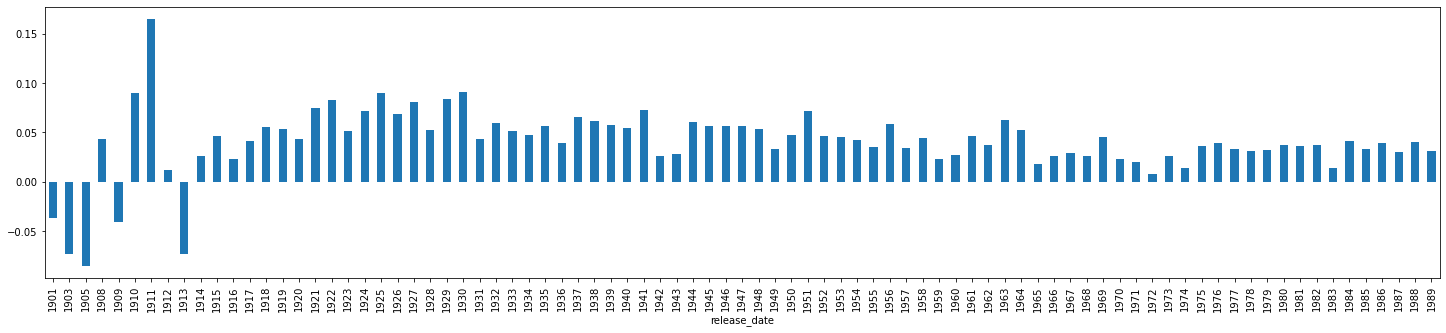

In [126]:
df_sorted_us = get_country_movies(df_sorted, 'United States of America')

begin = 1900
end = 1990
span_us = create_history_span(df_sorted_us, begin, end)

plot_sentiment_country_span(span_us)

print('Average sentiment of all movies in usa :', calculate_average_sentiment(df_sorted_us))

For Germany, between 1900 and 1990 :

average sentiment of all movies in germany : 0.04266313626282843


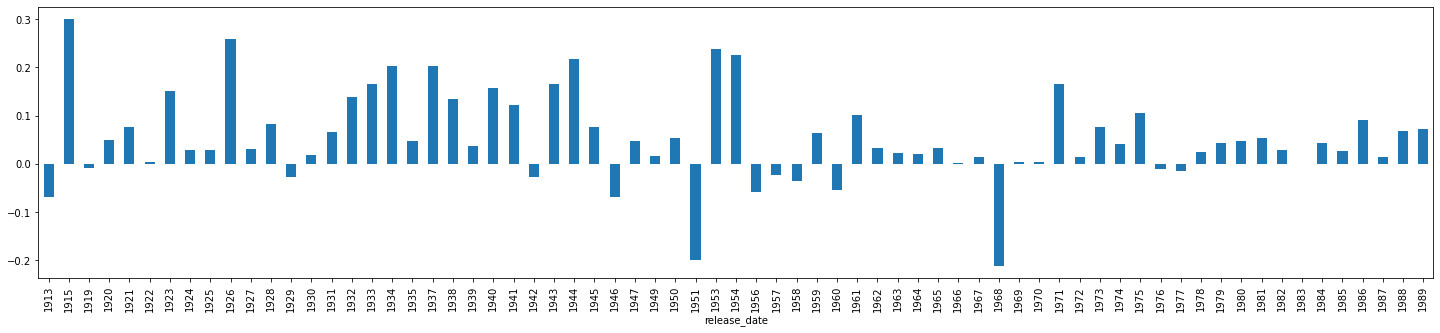

In [127]:
df_sorted_ge = get_country_movies(df_sorted, 'Germany')

begin = 1900
end = 1990
span_ge = create_history_span(df_sorted_ge, begin, end)

plot_sentiment_country_span(span_ge)

print('Average sentiment of all movies in germany :', calculate_average_sentiment(df_sorted_ge))

For France, between 1900 and 1990 :

average sentiment of all movies in france : 0.05001018041703206


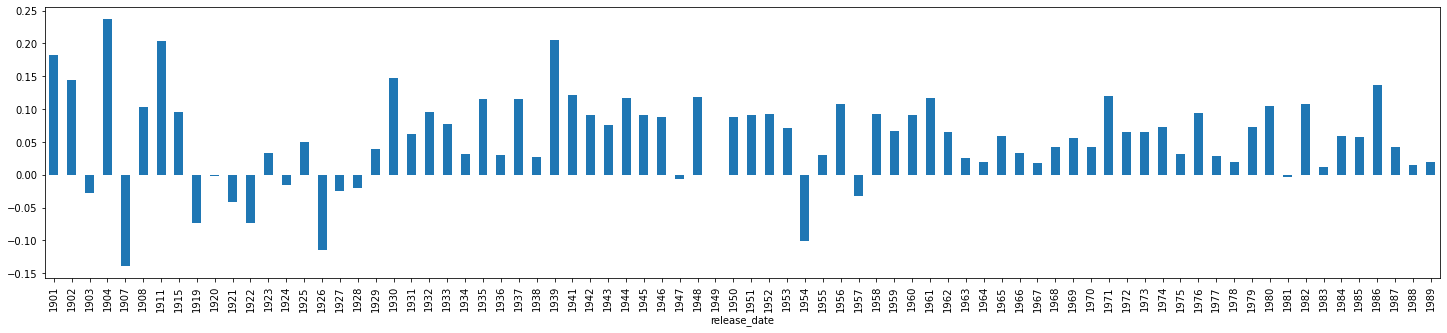

In [128]:
df_sorted_fr = get_country_movies(df_sorted, 'France')

begin = 1900
end = 1990
span_fr = create_history_span(df_sorted_fr, begin, end)

plot_sentiment_country_span(span_fr)

print('Average sentiment of all movies in france :', calculate_average_sentiment(df_sorted_fr))

For Italy, between 1900 and 1990 :

average sentiment of all movies in Italy : 0.03857576341424649


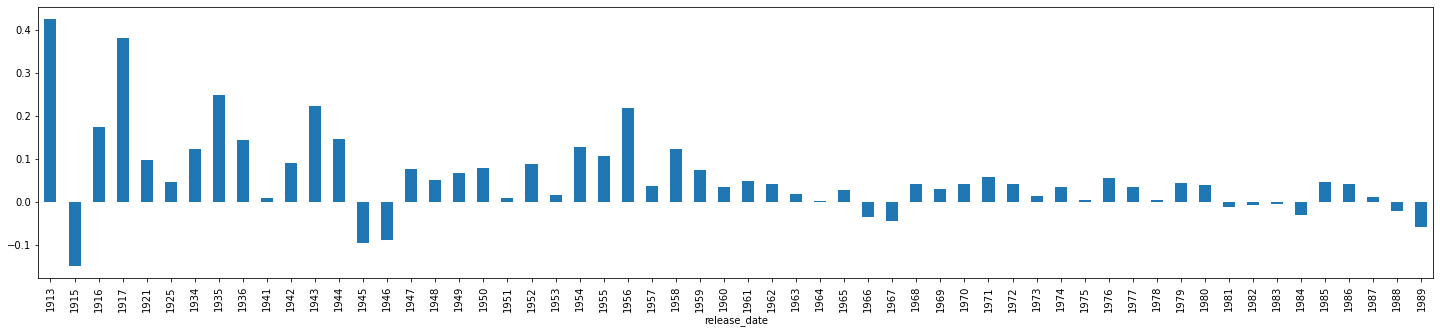

In [129]:
df_sorted_it = get_country_movies(df_sorted, 'Italy')

begin = 1900
end = 1990
span_it = create_history_span(df_sorted_it, begin, end)

plot_sentiment_country_span(span_it)

print('Average sentiment of all movies in Italy :', calculate_average_sentiment(df_sorted_it))